In [54]:
import pandas as pd


## Questions
    - Q1
    - Q2
    - Q3
    - Q4
    - Q5

You need the encoding line due to French characters

In [55]:
df = pd.read_csv('Resources/98-401-X2021002_English_CSV_data.csv', encoding='ISO-8859-1')


df.head()

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,...,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
0,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,1,"Population, 2021",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
1,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,2,"Population, 2016",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,3,"Population percentage change, 2016 to 2021",...,NaN,...,NaN,...,2.0,NaN,NaN,...,NaN,...
3,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,4,Total private dwellings,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
4,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,5,Private dwellings occupied by usual residents,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...


In [56]:
columns_to_keep=['GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL']
reduced_df=df[columns_to_keep]

In [57]:
#cut down columns for readability
reduced_df.head()

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,St. John's,1,"Population, 2021",212579.0
1,St. John's,2,"Population, 2016",208418.0
2,St. John's,3,"Population percentage change, 2016 to 2021",2.0
3,St. John's,4,Total private dwellings,97429.0
4,St. John's,5,Private dwellings occupied by usual residents,89999.0


# So, this is the 2021 census data for the entirety of Canada.  
    - GEO_NAME refers to the province/territory or you can use Canada to get the grand total.
    - If you look at the 98-401...meta.txt there's a portion that has CHARACTERISTIC_ID and the corresponding statistic which is stored in CHARACTERISTIC_NAME.  There are...a lot.
    


So, I just did a little test below after looking at some of the CHARACTERISTIC_ID and filtered the ones <= 7 which is population info.

In [58]:
filtered_df = reduced_df[reduced_df['CHARACTERISTIC_ID'] <= 7]

In [59]:
filtered_df.head(7)

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,St. John's,1,"Population, 2021",212579.00
1,St. John's,2,"Population, 2016",208418.00
2,St. John's,3,"Population percentage change, 2016 to 2021",2.00
3,St. John's,4,Total private dwellings,97429.00
4,St. John's,5,Private dwellings occupied by usual residents,89999.00
5,St. John's,6,Population density per square kilometre,228.20
6,St. John's,7,Land area in square kilometres,931.56


In [60]:
group_df=filtered_df.groupby(['GEO_NAME','CHARACTERISTIC_NAME'])['C1_COUNT_TOTAL'].sum()

In [61]:
group_df['Toronto']

CHARACTERISTIC_NAME
Land area in square kilometres                      5902.75
Population density per square kilometre             1050.70
Population percentage change, 2016 to 2021             4.60
Population, 2016                                 5928040.00
Population, 2021                                 6202225.00
Private dwellings occupied by usual residents    2262473.00
Total private dwellings                          2394205.00
Name: C1_COUNT_TOTAL, dtype: float64

In [62]:
pop_df = filtered_df[filtered_df['CHARACTERISTIC_ID']==1]

In [63]:
pop_df.head()


,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,St. John's,1,"Population, 2021",212579.0
2631,Grand Falls-Windsor,1,"Population, 2021",13853.0
5262,Gander,1,"Population, 2021",13414.0
7893,Corner Brook,1,"Population, 2021",29762.0
10524,Charlottetown,1,"Population, 2021",78858.0


In [64]:
pop_group=pop_df.groupby(['GEO_NAME','CHARACTERISTIC_NAME'])

## Top 25 Cities by Population

In [65]:
pop_group['C1_COUNT_TOTAL'].max().sort_values(ascending=False).head(15)

GEO_NAME                          CHARACTERISTIC_NAME
Toronto                           Population, 2021       6202225.0
Montréal                          Population, 2021       4291732.0
Vancouver                         Population, 2021       2642825.0
Ottawa - Gatineau                 Population, 2021       1488307.0
Calgary                           Population, 2021       1481806.0
Edmonton                          Population, 2021       1418118.0
Ottawa - Gatineau (Ontario part)  Population, 2021       1135014.0
Québec                            Population, 2021        839311.0
Winnipeg                          Population, 2021        834678.0
Hamilton                          Population, 2021        785184.0
Kitchener - Cambridge - Waterloo  Population, 2021        575847.0
London                            Population, 2021        543551.0
Halifax                           Population, 2021        465703.0
St. Catharines - Niagara          Population, 2021        433604.0
Windsor 

In [66]:
top_15_cities = pop_group['C1_COUNT_TOTAL'].max().sort_values(ascending=False).head(25)
top_15_cities = top_15_cities.index.get_level_values(0)
mask = reduced_df['GEO_NAME'].isin(top_15_cities)
top_15_pop_df = reduced_df[mask]


In [67]:

top_15_pop_df.head()

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,St. John's,1,"Population, 2021",212579.0
1,St. John's,2,"Population, 2016",208418.0
2,St. John's,3,"Population percentage change, 2016 to 2021",2.0
3,St. John's,4,Total private dwellings,97429.0
4,St. John's,5,Private dwellings occupied by usual residents,89999.0


In [68]:
#income = top_25_pop_df[(top_25_pop_df['CHARACTERISTIC_ID'] == 119) & (top_25_pop_df['CHARACTERISTIC_ID'] == 134)]

## Median and Average Income for Top 25 Cities

In [69]:
median_income = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 119]


In [70]:
average_income = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 134]

Text(0.5, 1.0, 'Median Income by City')

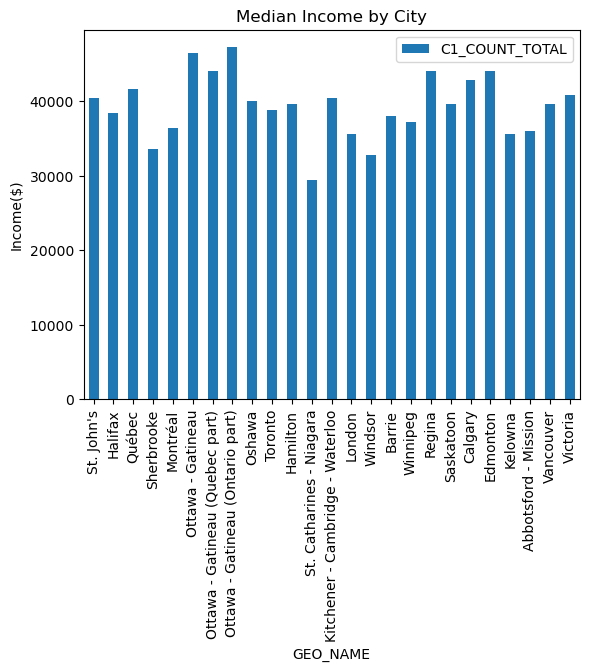

In [71]:
median_graph = median_income.plot(kind='bar',x='GEO_NAME',y='C1_COUNT_TOTAL')

median_graph.set_ylabel('Income($)')
median_graph.set_title('Median Income by City')


Text(0.5, 1.0, 'Average Income by City')

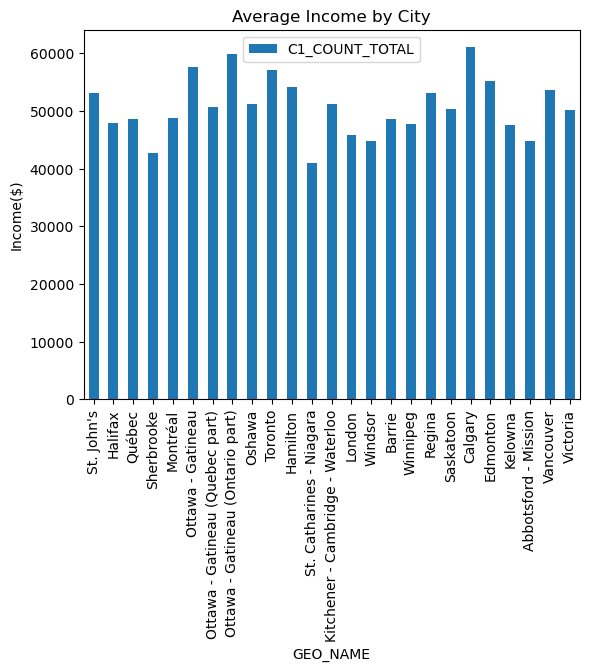

In [72]:
average_graph = average_income.plot(kind='bar',x='GEO_NAME',y='C1_COUNT_TOTAL')

average_graph.set_ylabel('Income($)')
average_graph.set_title('Average Income by City')

## Employment Rate

In [73]:
emp_rate_df = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 2229]
emp_rate_df

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
2228,St. John's,2229,Employment rate,56.9
18014,Halifax,2229,Employment rate,58.0
75896,Québec,2229,Employment rate,62.0
86420,Sherbrooke,2229,Employment rate,59.3
112730,Montréal,2229,Employment rate,60.7
141671,Ottawa - Gatineau,2229,Employment rate,59.6
144302,Ottawa - Gatineau (Quebec part),2229,Employment rate,61.0
146933,Ottawa - Gatineau (Ontario part),2229,Employment rate,59.2
175874,Oshawa,2229,Employment rate,56.0
181136,Toronto,2229,Employment rate,56.1


<AxesSubplot:xlabel='GEO_NAME'>

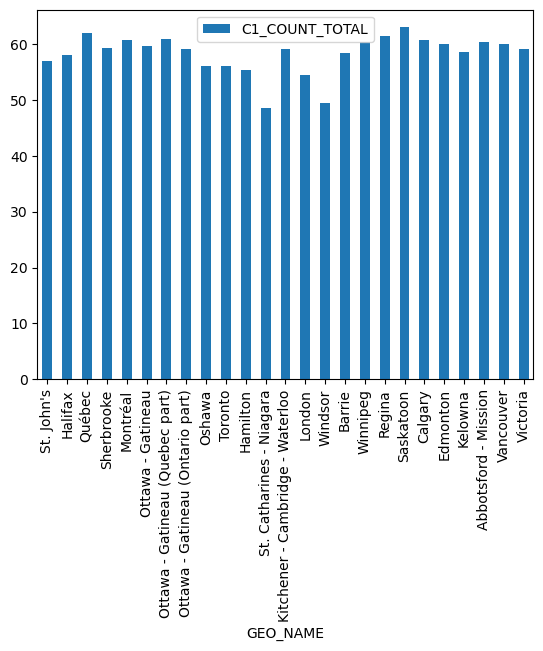

In [74]:
employment_graph = emp_rate_df.plot(kind='bar',x='GEO_NAME',y='C1_COUNT_TOTAL')
employment_graph

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/crime_data.csv'

## Weather

In [76]:
weather_df = pd.read_csv('Resources/weather_data.csv')
weather_df=weather_df.rename(columns={'GEO':'GEO_NAME'})
weather_df.head(25)

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/weather_data.csv'

In [ ]:
merged_df = pd.merge(top_15_pop_df,weather_df,on='GEO_NAME',how='inner')
merge_to_keep = ['GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL','Lat','Lng','Max Temp','Humidity','Wind Speed']
merged_df = merged_df[merge_to_keep]

## Crime

In [ ]:
crime_df = pd.read_csv('Resources/crime_data.csv')
crime_df = crime_df.rename(columns={'City':'GEO_NAME'})
merged_df = pd.merge(merged_df,crime_df,on='GEO_NAME',how='inner')

In [ ]:
merge_to_keep = ['GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL','Lat','Lng','Max Temp','Humidity','Wind Speed','Crime severity index']
merged_df = merged_df.rename(columns={'VALUE':'Crime severity index'})
merged_df = merged_df[merge_to_keep]

## Cultural Activity

## Shelter Cost

In [ ]:
## Median monthly shelter costs for owned dwellings 
med_owned_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1486]
med_owned_shelter_cost

In [ ]:
## Average monthly shelter costs for owned dwellings 
av_owned_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1487]
av_owned_shelter_cost

In [ ]:
## Median monthly shelter costs for rented dwellings 
med_rented_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1494]
med_rented_shelter_cost

In [ ]:
## Average monthly shelter costs for rented dwellings 
av_rented_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1495]
av_rented_shelter_cost